In [1]:
# IMPORTING REQUIRED MODULES

import matplotlib.pyplot as plt
import pandas as pd
import regex as re
from datetime import datetime
import numpy as np

In [2]:
temperature_df = pd.read_csv('Temperature.csv')

In [3]:
temperature_df

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106
...,...,...,...,...
165080,USC00205822,2015-06-09,TMAX,256
165081,USC00205822,2009-10-06,TMAX,167
165082,USC00205050,2014-07-14,TMAX,283
165083,USC00200230,2006-11-29,TMIN,117


In [4]:
tmp_df = temperature_df.copy()

In [5]:
# FILTERING 2015 YEAR

def df_2015(date):
    a = re.search("2015-\d\d-\d\d",date)
    if a:
        return True
    else:
        return False

In [6]:
tmp_df['2015'] = np.vectorize(df_2015)(tmp_df['Date'])

In [7]:
tmp_df_2015 = tmp_df.loc[tmp_df['2015']==True]

In [8]:
tmp_df_2015

,ID,Date,Element,Data_Value,2015
19,USC00205563,2015-01-03,TMIN,-39,True
30,USC00203712,2015-03-17,TMAX,189,True
34,USC00200032,2015-06-06,TMIN,128,True
46,USW00014833,2015-08-30,TMIN,178,True
50,USC00202308,2015-08-30,TMIN,156,True
...,...,...,...,...,...
165054,USC00208080,2015-02-14,TMIN,-211,True
165056,USC00200228,2015-02-23,TMAX,-11,True
165059,USC00207312,2015-06-23,TMIN,172,True
165072,USC00208080,2015-11-14,TMIN,-17,True


In [9]:
filtering_2015 = [t for t in tmp_df_2015.index]

In [10]:
# DROPPING 2015 DATA FROM MAIN DATAFRAME

tmp_df = tmp_df.drop(filtering_2015)

In [11]:
tmp_df.drop('2015',axis=1,inplace=True)

In [12]:
tmp_df

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106
...,...,...,...,...
165079,USC00202308,2005-03-02,TMIN,-67
165081,USC00205822,2009-10-06,TMAX,167
165082,USC00205050,2014-07-14,TMAX,283
165083,USC00200230,2006-11-29,TMIN,117


In [13]:
# BOOLEAN LEAP DAYS THAT IS FEB 29

def leap(date):
    a = re.search("\d\d\d\d-02-29",date)
    if a:
        return True
    else:
        return False

In [14]:
tmp_df['leap_days'] = np.vectorize(leap)(tmp_df['Date'])

In [15]:
tmp_df

,ID,Date,Element,Data_Value,leap_days
0,USW00094889,2014-11-12,TMAX,22,False
1,USC00208972,2009-04-29,TMIN,56,False
2,USC00200032,2008-05-26,TMAX,278,False
3,USC00205563,2005-11-11,TMAX,139,False
4,USC00200230,2014-02-27,TMAX,-106,False
...,...,...,...,...,...
165079,USC00202308,2005-03-02,TMIN,-67,False
165081,USC00205822,2009-10-06,TMAX,167,False
165082,USC00205050,2014-07-14,TMAX,283,False
165083,USC00200230,2006-11-29,TMIN,117,False


In [16]:
# FILTERING THOSE LEAP DAYS

tmp_df = tmp_df.loc[tmp_df['leap_days']==False]

In [17]:
tmp_df

,ID,Date,Element,Data_Value,leap_days
0,USW00094889,2014-11-12,TMAX,22,False
1,USC00208972,2009-04-29,TMIN,56,False
2,USC00200032,2008-05-26,TMAX,278,False
3,USC00205563,2005-11-11,TMAX,139,False
4,USC00200230,2014-02-27,TMAX,-106,False
...,...,...,...,...,...
165079,USC00202308,2005-03-02,TMIN,-67,False
165081,USC00205822,2009-10-06,TMAX,167,False
165082,USC00205050,2014-07-14,TMAX,283,False
165083,USC00200230,2006-11-29,TMIN,117,False


In [18]:
# ASSIGNING DAY OF YEAR 

def day_of_year(date):
    day_list = date.split('-')
    day = datetime(int(day_list[0]),int(day_list[1]),int(day_list[2])).timetuple().tm_yday
    return day

In [19]:
tmp_df['day_of_year'] = np.vectorize(day_of_year)(tmp_df['Date'])

<ipython-input-19-65bc9149bc03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['day_of_year'] = np.vectorize(day_of_year)(tmp_df['Date'])


In [20]:
tmp_df

,ID,Date,Element,Data_Value,leap_days,day_of_year
0,USW00094889,2014-11-12,TMAX,22,False,316
1,USC00208972,2009-04-29,TMIN,56,False,119
2,USC00200032,2008-05-26,TMAX,278,False,147
3,USC00205563,2005-11-11,TMAX,139,False,315
4,USC00200230,2014-02-27,TMAX,-106,False,58
...,...,...,...,...,...,...
165079,USC00202308,2005-03-02,TMIN,-67,False,61
165081,USC00205822,2009-10-06,TMAX,167,False,279
165082,USC00205050,2014-07-14,TMAX,283,False,195
165083,USC00200230,2006-11-29,TMIN,117,False,333


In [21]:
# BOOLEAN LEAP YEARS THAT IS 2008 AND 2012

def leap_year(date):
    day_list = date.split('-')
    if (day_list[0] == '2008') or (day_list[0] == '2012'):
        return True
    else:
        return False

In [22]:
tmp_df['is_leap_year'] = np.vectorize(leap_year)(tmp_df['Date'])

<ipython-input-22-5744ee596558>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['is_leap_year'] = np.vectorize(leap_year)(tmp_df['Date'])


In [23]:
tmp_df

,ID,Date,Element,Data_Value,leap_days,day_of_year,is_leap_year
0,USW00094889,2014-11-12,TMAX,22,False,316,False
1,USC00208972,2009-04-29,TMIN,56,False,119,False
2,USC00200032,2008-05-26,TMAX,278,False,147,True
3,USC00205563,2005-11-11,TMAX,139,False,315,False
4,USC00200230,2014-02-27,TMAX,-106,False,58,False
...,...,...,...,...,...,...,...
165079,USC00202308,2005-03-02,TMIN,-67,False,61,False
165081,USC00205822,2009-10-06,TMAX,167,False,279,False
165082,USC00205050,2014-07-14,TMAX,283,False,195,False
165083,USC00200230,2006-11-29,TMIN,117,False,333,False


In [24]:
# for leap year march is 61
tmp_df.loc[tmp_df['Date']=='2008-03-01']

,ID,Date,Element,Data_Value,leap_days,day_of_year,is_leap_year
150725,USC00207308,2008-03-01,TMAX,28,False,61,True
151702,USW00004848,2008-03-01,TMIN,-32,False,61,True
151710,USW00004848,2008-03-01,TMAX,11,False,61,True
151977,USC00208202,2008-03-01,TMAX,22,False,61,True
152456,USC00205451,2008-03-01,TMIN,-67,False,61,True
152467,USC00205451,2008-03-01,TMAX,22,False,61,True
153242,USC00207320,2008-03-01,TMAX,33,False,61,True
153361,USC00205822,2008-03-01,TMIN,-56,False,61,True
153403,USC00205822,2008-03-01,TMAX,28,False,61,True
154585,USC00200228,2008-03-01,TMIN,-72,False,61,True


In [25]:
# for normal year march is 60
tmp_df.loc[tmp_df['Date']=='2013-03-01']

,ID,Date,Element,Data_Value,leap_days,day_of_year,is_leap_year
5997,USW00014833,2013-03-01,TMAX,-17,False,60,False
5999,USW00014833,2013-03-01,TMIN,-44,False,60,False
6107,USW00014853,2013-03-01,TMAX,0,False,60,False
6108,USW00014853,2013-03-01,TMIN,-27,False,60,False
6228,USC00208972,2013-03-01,TMAX,17,False,60,False
6355,USC00208972,2013-03-01,TMIN,-39,False,60,False
6901,USC00203712,2013-03-01,TMIN,-50,False,60,False
6903,USC00203712,2013-03-01,TMAX,11,False,60,False
6928,USC00207312,2013-03-01,TMAX,39,False,60,False
6929,USC00207312,2013-03-01,TMIN,-67,False,60,False


In [26]:
# CORRECTING LEAP YEAR DATES FROM 366 DAYS TO 365 DAYS

day_correction = tmp_df.loc[tmp_df['is_leap_year'] == True]

In [27]:
day_correction

,ID,Date,Element,Data_Value,leap_days,day_of_year,is_leap_year
2,USC00200032,2008-05-26,TMAX,278,False,147,True
11,USC00205822,2008-05-29,TMIN,28,False,150,True
12,USC00203712,2008-10-17,TMIN,17,False,291,True
16,USC00205822,2008-09-07,TMAX,250,False,251,True
18,USC00203712,2008-02-22,TMAX,-44,False,53,True
...,...,...,...,...,...,...,...
165051,USC00205451,2008-09-18,TMIN,100,False,262,True
165052,USC00208080,2008-11-03,TMIN,50,False,308,True
165061,USW00004848,2012-12-26,TMIN,-32,False,361,True
165064,USC00207312,2008-08-04,TMIN,172,False,217,True


In [28]:
# DROPPING LEAP YEARS FROM MAIN DATAFRAME

index_list = [a for a in day_correction.index]

In [29]:
tmp_df = tmp_df.drop(index_list)

In [30]:
tmp_df

,ID,Date,Element,Data_Value,leap_days,day_of_year,is_leap_year
0,USW00094889,2014-11-12,TMAX,22,False,316,False
1,USC00208972,2009-04-29,TMIN,56,False,119,False
3,USC00205563,2005-11-11,TMAX,139,False,315,False
4,USC00200230,2014-02-27,TMAX,-106,False,58,False
5,USW00014833,2010-10-01,TMAX,194,False,274,False
...,...,...,...,...,...,...,...
165079,USC00202308,2005-03-02,TMIN,-67,False,61,False
165081,USC00205822,2009-10-06,TMAX,167,False,279,False
165082,USC00205050,2014-07-14,TMAX,283,False,195,False
165083,USC00200230,2006-11-29,TMIN,117,False,333,False


In [31]:
# DAY CORRECTION

def correction(day):
    if day >= 61:
        return day - 1
    else:
        return day

In [32]:
day_correction['day_of_year'] = np.vectorize(correction)(day_correction['day_of_year'])

<ipython-input-32-6242a6b3981c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_correction['day_of_year'] = np.vectorize(correction)(day_correction['day_of_year'])


In [33]:
day_correction

,ID,Date,Element,Data_Value,leap_days,day_of_year,is_leap_year
2,USC00200032,2008-05-26,TMAX,278,False,146,True
11,USC00205822,2008-05-29,TMIN,28,False,149,True
12,USC00203712,2008-10-17,TMIN,17,False,290,True
16,USC00205822,2008-09-07,TMAX,250,False,250,True
18,USC00203712,2008-02-22,TMAX,-44,False,53,True
...,...,...,...,...,...,...,...
165051,USC00205451,2008-09-18,TMIN,100,False,261,True
165052,USC00208080,2008-11-03,TMIN,50,False,307,True
165061,USW00004848,2012-12-26,TMIN,-32,False,360,True
165064,USC00207312,2008-08-04,TMIN,172,False,216,True


In [34]:
# CONCATENATING MAIN DATAFRAME AND DAY_CORRECTION DATAFRAME

filtered_df = pd.concat([tmp_df,day_correction])

In [35]:
filtered_df

,ID,Date,Element,Data_Value,leap_days,day_of_year,is_leap_year
0,USW00094889,2014-11-12,TMAX,22,False,316,False
1,USC00208972,2009-04-29,TMIN,56,False,119,False
3,USC00205563,2005-11-11,TMAX,139,False,315,False
4,USC00200230,2014-02-27,TMAX,-106,False,58,False
5,USW00014833,2010-10-01,TMAX,194,False,274,False
...,...,...,...,...,...,...,...
165051,USC00205451,2008-09-18,TMIN,100,False,261,True
165052,USC00208080,2008-11-03,TMIN,50,False,307,True
165061,USW00004848,2012-12-26,TMIN,-32,False,360,True
165064,USC00207312,2008-08-04,TMIN,172,False,216,True


In [36]:
tmp_df_2015

,ID,Date,Element,Data_Value,2015
19,USC00205563,2015-01-03,TMIN,-39,True
30,USC00203712,2015-03-17,TMAX,189,True
34,USC00200032,2015-06-06,TMIN,128,True
46,USW00014833,2015-08-30,TMIN,178,True
50,USC00202308,2015-08-30,TMIN,156,True
...,...,...,...,...,...
165054,USC00208080,2015-02-14,TMIN,-211,True
165056,USC00200228,2015-02-23,TMAX,-11,True
165059,USC00207312,2015-06-23,TMIN,172,True
165072,USC00208080,2015-11-14,TMIN,-17,True


In [37]:
# DROPPING NOT REQUIRED COLUMNS 

filtered_df.drop(['leap_days','is_leap_year'],axis=1,inplace=True)
tmp_df_2015.drop('2015',axis=1,inplace=True)

In [38]:
tmp_df_2015

,ID,Date,Element,Data_Value
19,USC00205563,2015-01-03,TMIN,-39
30,USC00203712,2015-03-17,TMAX,189
34,USC00200032,2015-06-06,TMIN,128
46,USW00014833,2015-08-30,TMIN,178
50,USC00202308,2015-08-30,TMIN,156
...,...,...,...,...
165054,USC00208080,2015-02-14,TMIN,-211
165056,USC00200228,2015-02-23,TMAX,-11
165059,USC00207312,2015-06-23,TMIN,172
165072,USC00208080,2015-11-14,TMIN,-17


In [39]:
# ADDING DAY OF YEAR TO 2015 DATAFRAME

tmp_df_2015['day_of_year'] = np.vectorize(day_of_year)(tmp_df_2015['Date'])

In [40]:
tmp_df_2015

,ID,Date,Element,Data_Value,day_of_year
19,USC00205563,2015-01-03,TMIN,-39,3
30,USC00203712,2015-03-17,TMAX,189,76
34,USC00200032,2015-06-06,TMIN,128,157
46,USW00014833,2015-08-30,TMIN,178,242
50,USC00202308,2015-08-30,TMIN,156,242
...,...,...,...,...,...
165054,USC00208080,2015-02-14,TMIN,-211,45
165056,USC00200228,2015-02-23,TMAX,-11,54
165059,USC00207312,2015-06-23,TMIN,172,174
165072,USC00208080,2015-11-14,TMIN,-17,318


In [41]:
filtered_df

,ID,Date,Element,Data_Value,day_of_year
0,USW00094889,2014-11-12,TMAX,22,316
1,USC00208972,2009-04-29,TMIN,56,119
3,USC00205563,2005-11-11,TMAX,139,315
4,USC00200230,2014-02-27,TMAX,-106,58
5,USW00014833,2010-10-01,TMAX,194,274
...,...,...,...,...,...
165051,USC00205451,2008-09-18,TMIN,100,261
165052,USC00208080,2008-11-03,TMIN,50,307
165061,USW00004848,2012-12-26,TMIN,-32,360
165064,USC00207312,2008-08-04,TMIN,172,216


In [42]:
# DIVIDING DATA_VALUE COLUMN BY 10 BECAUSE GIVEN VALUES ARE TENTHS OF DEGREE C

def divided_by_10(value):
    return value/10

In [43]:
tmp_df_2015['Data_Value'] = np.vectorize(divided_by_10)(tmp_df_2015['Data_Value'])
filtered_df['Data_Value'] = np.vectorize(divided_by_10)(filtered_df['Data_Value'])

In [44]:
tmp_df_2015

,ID,Date,Element,Data_Value,day_of_year
19,USC00205563,2015-01-03,TMIN,-3.9,3
30,USC00203712,2015-03-17,TMAX,18.9,76
34,USC00200032,2015-06-06,TMIN,12.8,157
46,USW00014833,2015-08-30,TMIN,17.8,242
50,USC00202308,2015-08-30,TMIN,15.6,242
...,...,...,...,...,...
165054,USC00208080,2015-02-14,TMIN,-21.1,45
165056,USC00200228,2015-02-23,TMAX,-1.1,54
165059,USC00207312,2015-06-23,TMIN,17.2,174
165072,USC00208080,2015-11-14,TMIN,-1.7,318


In [45]:
filtered_df

,ID,Date,Element,Data_Value,day_of_year
0,USW00094889,2014-11-12,TMAX,2.2,316
1,USC00208972,2009-04-29,TMIN,5.6,119
3,USC00205563,2005-11-11,TMAX,13.9,315
4,USC00200230,2014-02-27,TMAX,-10.6,58
5,USW00014833,2010-10-01,TMAX,19.4,274
...,...,...,...,...,...
165051,USC00205451,2008-09-18,TMIN,10.0,261
165052,USC00208080,2008-11-03,TMIN,5.0,307
165061,USW00004848,2012-12-26,TMIN,-3.2,360
165064,USC00207312,2008-08-04,TMIN,17.2,216


In [46]:
# GROUPING BOTH DATAFRAMES BY MINIMUM AND MAXIMUM TEMPERATURE ON EACH DAY

In [47]:
# YEAR 2015

min_max_tmp_of_2015 = tmp_df_2015.groupby('day_of_year').agg([min,max])['Data_Value']

In [48]:
min_max_tmp_of_2015

,min,max
day_of_year,,
1,-13.3,1.1
2,-12.2,3.9
3,-6.7,3.9
4,-8.8,4.4
5,-15.5,2.8
...,...,...
361,-0.6,8.3
362,-3.9,6.1
363,-3.9,10.0


In [49]:
# YEAR 2005 - 2014

min_max_tmp_2005_to_2014 = filtered_df.groupby('day_of_year').agg([min,max])['Data_Value']

In [50]:
min_max_tmp_2005_to_2014

,min,max
day_of_year,,
1,-16.0,15.6
2,-26.7,13.9
3,-26.7,13.3
4,-26.1,10.6
5,-15.0,12.8
...,...,...
361,-13.8,18.9
362,-16.6,19.4
363,-15.0,12.8


In [51]:
min_max_tmp_2005_to_2014 = min_max_tmp_2005_to_2014.reset_index()

In [52]:
min_max_tmp_2005_to_2014

,day_of_year,min,max
0,1,-16.0,15.6
1,2,-26.7,13.9
2,3,-26.7,13.3
3,4,-26.1,10.6
4,5,-15.0,12.8
...,...,...,...
360,361,-13.8,18.9
361,362,-16.6,19.4
362,363,-15.0,12.8
363,364,-14.4,11.7


In [53]:
# CHECKING ON WHICH DAYS 2015 HAS BROKEN A RECORD OF THE LAST TEN YEARS

def minimum_broken_2015(min_10_years,min_2015):
    if min_2015 < min_10_years:
        return min_2015
    
def maximum_broken_2015(max_10_years,max_2015):
    if max_2015 > max_10_years:
        return max_2015

In [54]:
final_df = min_max_tmp_2005_to_2014[['day_of_year','min','max']]

In [55]:
final_df['2015-Minimum-Record'] = np.vectorize(minimum_broken_2015)(min_max_tmp_2005_to_2014['min'],
                                                         min_max_tmp_of_2015['min'])

final_df['2015-Maximum-Record'] = np.vectorize(maximum_broken_2015)(min_max_tmp_2005_to_2014['max'],
                                                         min_max_tmp_of_2015['max'])

In [56]:
final_df

,day_of_year,min,max,2015-Minimum-Record,2015-Maximum-Record
0,1,-16.0,15.6,None,None
1,2,-26.7,13.9,None,None
2,3,-26.7,13.3,None,None
3,4,-26.1,10.6,None,None
4,5,-15.0,12.8,-15.5,None
...,...,...,...,...,...
360,361,-13.8,18.9,None,None
361,362,-16.6,19.4,None,None
362,363,-15.0,12.8,None,None
363,364,-14.4,11.7,None,None


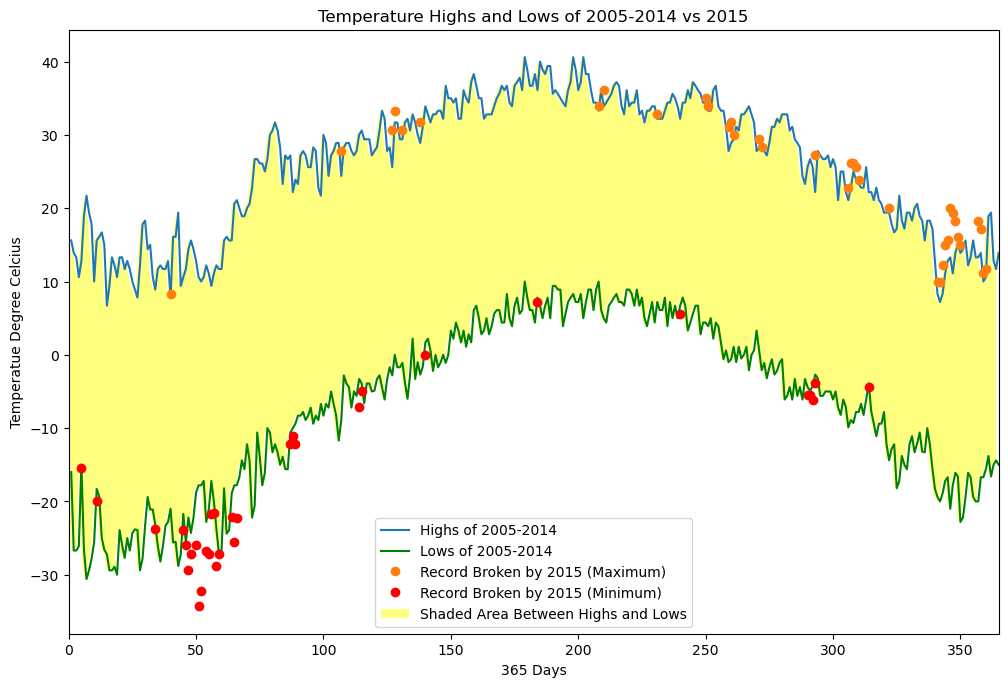

In [57]:
# PLOTTING THE GRAPH

plt.figure(figsize=(12,8),dpi=100)
observation_dates = final_df['day_of_year']
plt.title("Temperature Highs and Lows of 2005-2014 vs 2015")
plt.xlabel("365 Days")
plt.ylabel("Temperatue Degree Celcius")
plt.xlim(0,365)
plt.plot(observation_dates, final_df['max'],label='Highs of 2005-2014')
plt.plot(observation_dates, final_df['min'],'g',label='Lows of 2005-2014')
plt.plot(observation_dates, final_df['2015-Maximum-Record'],'o',label="Record Broken by 2015 (Maximum)")
plt.plot(observation_dates, final_df['2015-Minimum-Record'],'o',color='red',label="Record Broken by 2015 (Minimum)")
plt.fill_between(range(len(observation_dates)),
                final_df['max'],final_df['min'],
                facecolor='yellow',
                label='Shaded Area Between Highs and Lows', 
                alpha=0.5)
plt.legend()
plt.savefig('Temperature_2005-2014_VS_2015.png')
plt.show()